In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from brokenaxes import brokenaxes

In [42]:
file_path = "/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Hemolysis_Plots/20240201_Hemolysis_DIPLibrary_pDNA5ng.xlsx" 
sheet_name = "Sheet2"  
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [43]:
polymers = df['Polymer']
avg = df['hemolysis avg']
stdev = df['stddev']
NP_ratio = df['N/P ratio']

In [44]:
np_ratio_colors = {
    '1.0': '#a559aa',   # N/P = 1
    '5.0': '#59a89c',   # N/P = 5
    '7.5': '#f0c561', # N/P = 7.5
    '10.0': '#e02b35'   # N/P = 10
}

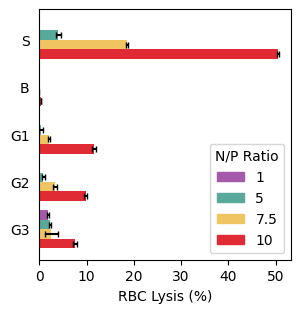

In [45]:
# Set the figure size
plt.figure(figsize=(3.25, 3.25))

# Initialize poly_index
poly_index = 0

# Loop through each polymer to plot bars
for polymer in df['Polymer'].unique():
    poly_df = df[df['Polymer'] == polymer]
    num_entries = len(poly_df['N/P ratio'].unique())

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # Calculate the y position for other bars, keeping them grouped together
        y = poly_index + (ratio_index - (num_entries - 1) / 2) * 0.2
        mean_value = group_df['hemolysis avg'].mean()
        std_dev = group_df['stddev'].mean()
        
        # Plot the bars
        plt.barh(y, mean_value, color=np_ratio_colors[str(np_ratio)], height=0.2)
        
        # Add error bars
        plt.errorbar(x=mean_value, y=y, xerr=std_dev, fmt='none', c='black', capsize=2)

    poly_index += 1

plt.gca().invert_yaxis()
plt.tick_params(left=False)
custom_labels = ['S', 'B', 'G1', 'G2', 'G3']
plt.yticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.xlabel('RBC Lysis (%)')
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0)

legend_handles = [mpatches.Patch(color=color, label=str(int(float(label))) if float(label).is_integer() else label)
                  for label, color in np_ratio_colors.items()]

plt.legend(handles=legend_handles, title='N/P Ratio')

plt.show()

/var/folders/dy/5pp8f0k5741b6sm60ch4xzhc0000gn/T/ipykernel_17374/4178431601.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels, fontsize=14)


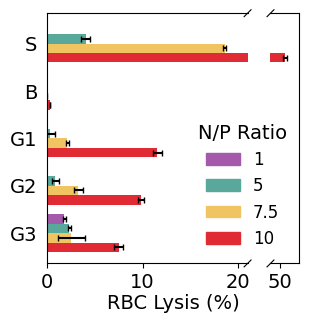

In [47]:
fig = plt.figure(figsize=(3.25, 3.25))
bax = brokenaxes(xlims=((0, 21), (49, 52)), hspace=.05, fig=fig, despine=False)

poly_index = 0

for polymer in df['Polymer'].unique():
    poly_df = df[df['Polymer'] == polymer]
    num_entries = len(poly_df['N/P ratio'].unique())

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # Calculate the y position for other bars, keeping them grouped together
        y = poly_index + (ratio_index - (num_entries - 1) / 2) * 0.2
        mean_value = group_df['hemolysis avg'].mean()
        std_dev = group_df['stddev'].mean()
        
        # Plot the bars
        bax.barh(y, mean_value, color=np_ratio_colors[str(np_ratio)], height=0.2)
        
        # Add error bars
        bax.errorbar(x=mean_value, y=y, xerr=std_dev, fmt='none', c='black', capsize=2)

    poly_index += 1


custom_labels = ['S', 'B', 'G1', 'G2', 'G3']
custom_positions = range(len(custom_labels))

for ax in bax.axs:
    ax.tick_params(left=False)  # This will remove left ticks on all subplots
    ax.set_yticks(custom_positions)  # Set y-tick positions
    ax.set_yticklabels(custom_labels, fontsize=14)
    ax.invert_yaxis()
    # Get current x-ticks and set their font size
    x_ticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(x_ticks_labels, fontsize=14)

plt.xlabel('RBC Lysis (%)', labelpad=22, fontsize=14)


legend_handles = [mpatches.Patch(color=color, label=str(int(float(label))) if float(label).is_integer() else label)
                  for label, color in np_ratio_colors.items()]

plt.legend(handles=legend_handles, title='N/P Ratio', loc='upper left', bbox_to_anchor=(0.54,0.62), 
           fontsize=12, title_fontsize=14, frameon=False)

plt.show()